In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


In [2]:
# Load the data
data = pd.read_csv("scaled_average_daily_data.csv")  # Replace with your dataset path

In [3]:
# Select features and target variable
features = ["Gb(i)", "Gd(i)", "Gr(i)", "H_sun", "T2m", "WS10m"]
target = "P"  # Power output to be forecasted

In [16]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features + [target]])


In [5]:
# Prepare data for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, :-1])  # Features
        y.append(data[i + seq_length, -1])  # Target variable (Power)
    return np.array(X), np.array(y)

seq_length = 30  # Define sequence length (e.g., use last 30 time steps)
X, y = create_sequences(scaled_data, seq_length)


In [6]:
# Split into training and testing sets
split_ratio = 0.8
train_size = int(len(X) * split_ratio)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# Define a modified LSTM model with dropout layers
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Add dropout layer with rate 0.2
model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))


In [26]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error') 
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 30, 64)         │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,625 (119.63 KB)

 Trainable params: 30,625 (119.63 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1972 - val_loss: 0.0508
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0528 - val_loss: 0.0408
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0414 - val_loss: 0.0383
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0351 - val_loss: 0.0375
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0457 - val_loss: 0.0379
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0328 - val_loss: 0.0374
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0335 - val_loss: 0.0365
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0314 - val_loss: 0.0428
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0355 - val_loss: 0.0383
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0299 - val_loss: 0.0371
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0323 - val_loss: 0.0373
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0347 - val_l

In [28]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


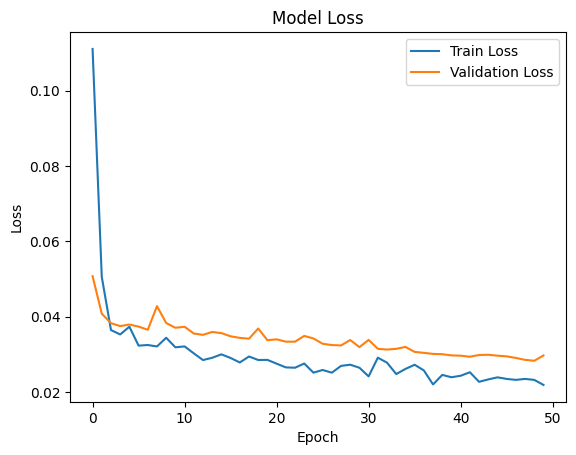

In [29]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [30]:
y_train_rescaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_train), len(features))), y_train.reshape(-1, 1)), axis=1))[:, -1]
y_test_rescaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), len(features))), y_test.reshape(-1, 1)), axis=1))[:, -1]
train_predictions_rescaled = scaler.inverse_transform(np.concatenate((np.zeros((len(train_predictions), len(features))), train_predictions), axis=1))[:, -1]
test_predictions_rescaled = scaler.inverse_transform(np.concatenate((np.zeros((len(test_predictions), len(features))), test_predictions), axis=1))[:, -1]

In [31]:
train_mae = mean_absolute_error(y_train_rescaled, train_predictions_rescaled)
train_rmse = np.sqrt(mean_squared_error(y_train_rescaled, train_predictions_rescaled))
test_mae = mean_absolute_error(y_test_rescaled, test_predictions_rescaled)
test_rmse = np.sqrt(mean_squared_error(y_test_rescaled, test_predictions_rescaled))


In [32]:
print(f"Train MAE: {train_mae}, Train RMSE: {train_rmse}")
print(f"Test MAE: {test_mae}, Test RMSE: {test_rmse}")

Train MAE: 27.687533676614823, Train RMSE: 33.64792986418978
Test MAE: 32.88637885224405, Test RMSE: 41.24569626290635


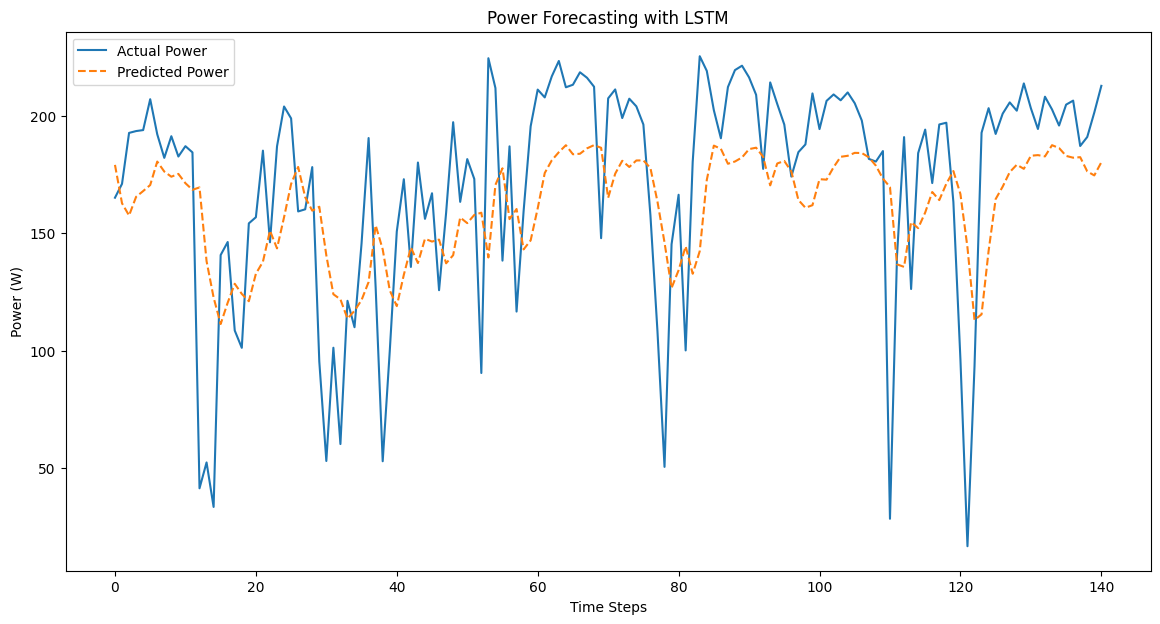

In [33]:
plt.figure(figsize=(14, 7))
plt.plot(y_test_rescaled, label="Actual Power")
plt.plot(test_predictions_rescaled, label="Predicted Power", linestyle="--")
plt.title("Power Forecasting with LSTM")
plt.xlabel("Time Steps")
plt.ylabel("Power (W)")
plt.legend()
plt.show()